In [1]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm

In [17]:
# Lista de archivos NIfTI
file = "./BrainAgeNeXt/lrp_mean_ADNI_CN.nii.gz"


Max absolute value in ./BrainAgeNeXt/lrp_mean_ADNI_CN.nii.gz: 10552.21484375
Index of max relevance in ./BrainAgeNeXt/lrp_mean_ADNI_CN.nii.gz: (np.int64(84), np.int64(60), np.int64(13))


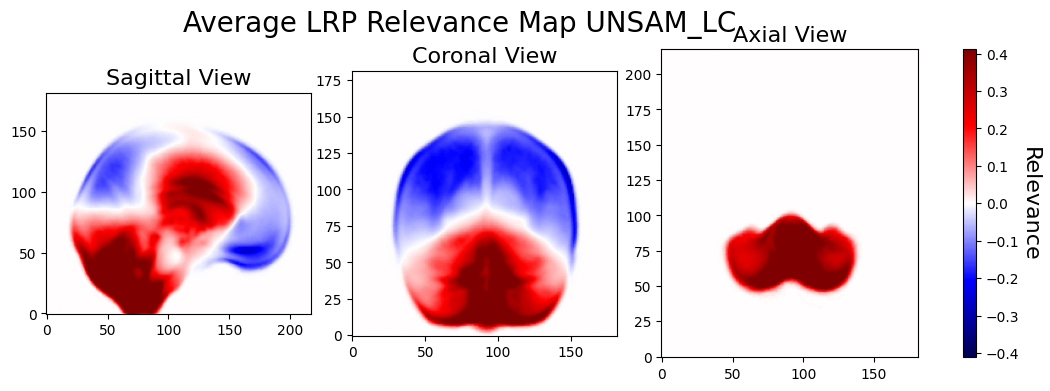

In [18]:
img = nib.load(file)
data = img.get_fdata()
    
# Normalizar por el valor absoluto máximo
max_abs_value = np.max(np.abs(data))

print(f"Max absolute value in {file}: {max_abs_value}")

normalized_data = data / max_abs_value
   
perc_clip = 99  # Percentil para clipping
# Clipping simétrico para mejorar contraste
vmax = np.percentile(np.abs(normalized_data), perc_clip)
norm = TwoSlopeNorm(vmin=-vmax, vcenter=0, vmax=vmax)

# Voxel más representativo
idx_max = np.unravel_index(np.argmax(np.abs(normalized_data)), normalized_data.shape)
print(f"Index of max relevance in {file}: {idx_max}")

# Slices rotados 180°
slices = [
np.fliplr(np.rot90(normalized_data[idx_max[0], :, :], k=3)),  # Sagittal
np.rot90(normalized_data[:, idx_max[1], :], k=3),  # Coronal
np.rot90(normalized_data[:, :, idx_max[2]], k=3)   # Axial
]

fig, axes = plt.subplots(1, 4, figsize=(12, 4), gridspec_kw={'width_ratios': [1, 1, 1, 0.05]})
views = ['Sagittal View', 'Coronal View', 'Axial View']

cmap = plt.cm.seismic
im = None

for ax, slc, view in zip(axes[:3], slices, views):
    im = ax.imshow(slc, cmap=cmap, norm=norm, origin='lower')
    ax.set_title(view, fontsize=16)
    #ax.set_xticks([])
    #ax.set_yticks([])
    ax.set_aspect('equal')

fig.suptitle('Average LRP Relevance Map UNSAM_LC', fontsize=20, x=0.47)
cbar = plt.colorbar(im, cax=axes[3])
cbar.set_label('Relevance', rotation=270, labelpad=15,fontsize=16)

# Ajustar sin deformar
fig.subplots_adjust(wspace=0.2)
#plt.savefig(out_path, bbox_inches='tight', dpi=300)
plt.show(fig)
plt.close(fig)

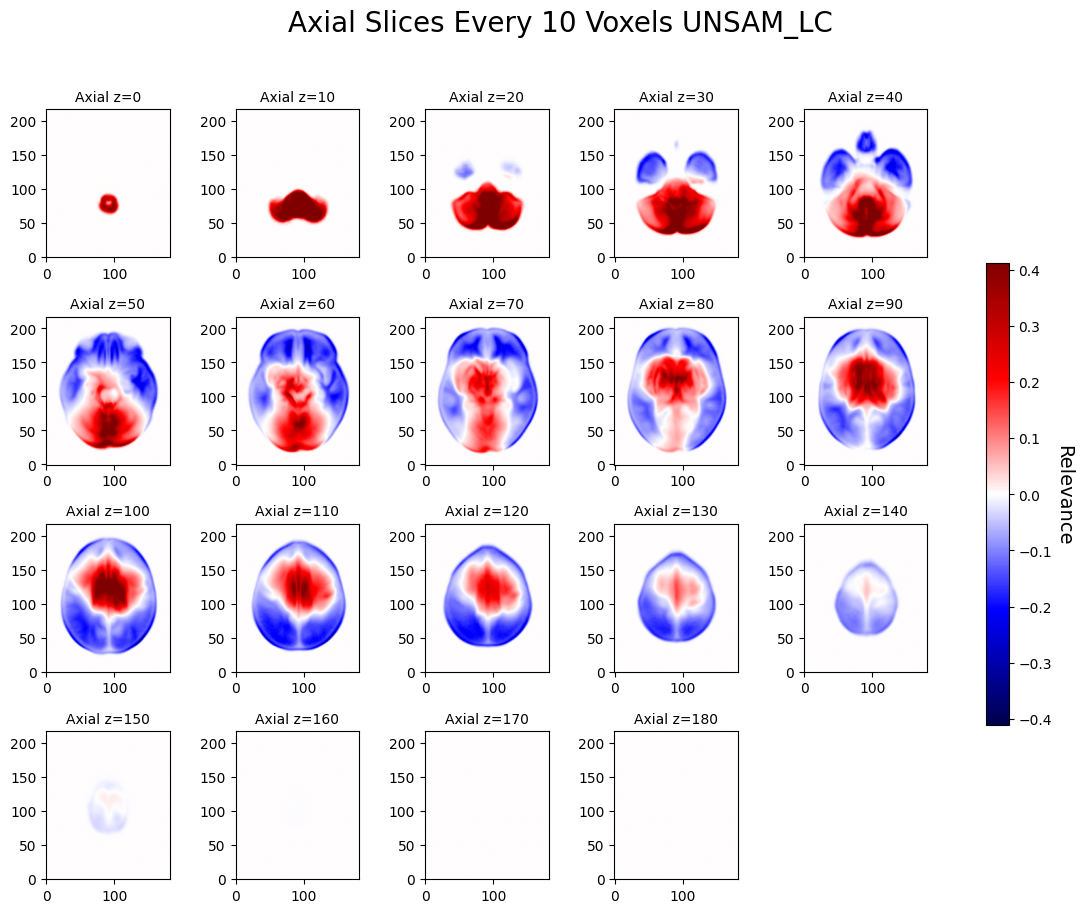

In [30]:
img = nib.load(file)
data = img.get_fdata()

# Normalizar por el valor absoluto máximo
max_abs_value = np.max(np.abs(data))
normalized_data = data / max_abs_value

perc_clip = 99
vmax = np.percentile(np.abs(normalized_data), perc_clip)
norm = TwoSlopeNorm(vmin=-vmax, vcenter=0, vmax=vmax)

#############################
# NUEVA PARTE: AXIALES CADA 10 VOXELES
#############################

z_dim = normalized_data.shape[2]

step = 10
axial_indices = list(range(0, z_dim, step))

# Mantener exactamente 20 subplots → 4×5
axial_indices = axial_indices[:20]

# Obtener slices
axial_slices = [
    np.rot90(normalized_data[:, :, z], k=3)
    for z in axial_indices
]

#############################

fig, axes = plt.subplots(4, 5, figsize=(15, 10))

cmap = plt.cm.seismic

# Aplanar axes para iterar
axes = axes.ravel()

for ax_i, ax in enumerate(axes):

    if ax_i < len(axial_slices):
        slc = axial_slices[ax_i]
        z = axial_indices[ax_i]

        im = ax.imshow(slc, cmap=cmap, norm=norm, origin='lower')
        ax.set_title(f'Axial z={z}', fontsize=10)
        ax.set_aspect('equal')

    else:
        # Subplot vacío si hay menos de 20 cortes
        ax.axis('off')

fig.suptitle('Axial Slices Every 10 Voxels UNSAM_LC', fontsize=20)

# Ajuste
fig.subplots_adjust(wspace=0.1, hspace=0.4)

# Colorbar general
cbar = fig.colorbar(im, ax=axes.tolist(), shrink=0.6)
cbar.set_label('Relevance', rotation=270, labelpad=15, fontsize=14)

plt.show()
plt.close(fig)


In [20]:
np.linspace(0, z_dim-1, 4, dtype=int)

array([  0,  60, 120, 181])